## 경로 설정 (커스텀 필요)

In [1]:
import os
import sys
print(f"현재 노트북 경로: {os.getcwd()}")
os.chdir("/Users/admin/workspace/python/Art_Price_DE")
print(f"변경된 노트북 경로: {os.getcwd()}")
print(f"현재 파이썬 라이브러리 인식 경로: {sys.path}")
sys.path.append('/Users/admin/workspace/python/Art_Price_DE')
print(f"추가된 파이썬 라이브러리 인식 경로: {sys.path[-1]}")

현재 노트북 경로: /Users/admin/workspace/python/Art_Price_DE
변경된 노트북 경로: /Users/admin/workspace/python/Art_Price_DE
현재 파이썬 라이브러리 인식 경로: ['/Users/admin/.pyenv/versions/3.10.12/lib/python310.zip', '/Users/admin/.pyenv/versions/3.10.12/lib/python3.10', '/Users/admin/.pyenv/versions/3.10.12/lib/python3.10/lib-dynload', '', '/Users/admin/workspace/python/Art_Price_DE/.venv/lib/python3.10/site-packages']
추가된 파이썬 라이브러리 인식 경로: /Users/admin/workspace/python/Art_Price_DE


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_concat = pd.read_json('transformed2/Pablo_Picasso/Pablo_Picasso_20250201_230830.json')
df_concat
df_concat.to_csv('csv/christies_Pablo_Picasso_20250201_230830.csv', index=False)

In [3]:
df1 = pd.read_csv("csv/christies_Pablo_Picasso_20250201_230830.csv", encoding='utf-8')
df2 = pd.read_csv("csv/phillips_Pablo_Picasso.csv", encoding='utf-8')
df3 = pd.read_csv("csv/converted_prices_picasso.csv", encoding='utf-8')

df_concat = pd.concat([df1, 
                       df2, 
                       df3,
                       ], ignore_index=True)
df_concat

,artist,title,end_date,estimate,low_estimate_USD,high_estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,estimateCurrency
0,Pablo_Picasso,Portrait d'homme,2011-05-05T00:00:00,"USD 250,000 - 350,000",250000.0,350000.0,5.785000e+05,Christies,1900.0,watercolor and charcoal on paper,NaN,48.9,32.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Pablo_Picasso,Deux nus féminins,2011-05-05T00:00:00,"USD 60,000 - 80,000",60000.0,80000.0,9.250000e+04,Christies,1920.0,pencil on paper,NaN,20.0,27.94,NaN,NaN,NaN,NaN,NaN,NaN
2,Pablo_Picasso,Femme pensive,2011-05-05T00:00:00,"USD 20,000 - 30,000",20000.0,30000.0,4.375000e+04,Christies,NaN,femme pensive,NaN,27.9,28.60,NaN,NaN,NaN,NaN,NaN,NaN
3,Pablo_Picasso,Minotaure,2011-05-05T00:00:00,"USD 100,000 - 150,000",100000.0,150000.0,2.305000e+05,Christies,1948.0,"gouache, pen and india ink and brush and gray ...",NaN,27.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Pablo_Picasso,Tête d'homme,2011-05-05T00:00:00,"USD 150,000 - 250,000",150000.0,250000.0,3.025000e+05,Christies,1966.0,pastel and colored wax crayons on board,NaN,31.0,23.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,2000000.0,3000000.0,2.719458e+06,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR
2261,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,150000.0,200000.0,2.716020e+05,sotheby's,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR
2262,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,20000.0,30000.0,3.018364e+04,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP
2263,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,8000.0,12000.0,8.737369e+03,sotheby's,NaN,pencil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP


In [4]:
# Mapper from material to type
MATERIAL_TO_TYPE = {
    # Paintings
    # english
    'oil': 'Oil Painting',
    'watercolour': 'Watercolor Painting',
    'watercolor': 'Watercolor Painting',
    'acrylic': 'Acrylic Painting',
    'gouache': 'Gouache Painting',
    # french
    'huile': 'Oil Painting',
    'aquarelle': 'Watercolor Painting',
    'acrylique': 'Acrylic Painting',
    
    # Prints
    # english
    'lithograph': 'Print',
    'screenprint': 'Print',
    'silkscreen': 'Print',
    'etching': 'Print',
    'aquatint': 'Print',
    'woodcut': 'Print',
    'linocut': 'Print',
    'drypoint': 'Print',
    'mezzotint': 'Print',
    'engraving': 'Print',
    'monotype': 'Print',
    "linoleum": 'Print',
    "print": 'Print',
    "etching": 'Print',
    "engrave": 'Print',
    # french
    'lithographie': 'Print',
    'sérigraphie': 'Print',
    'eau-forte': 'Print',
    'aquatinte': 'Print',
    'gravure': 'Print',
    "linoléum": 'Print',
    "linogravure": 'Print',
    "pointe sèche": 'Print',
    "mezzotinte": 'Print',
    "taille-douce": 'Print',
        
    # Drawings
    # english
    'graphite': 'Drawing',
    'ink': 'Drawing',
    'pencil': 'Drawing',
    'pastel': 'Drawing',
    'charcoal': 'Drawing',
    'crayon': 'Drawing',
    'pen': 'Drawing',
    # french
    'crayon': 'Drawing',
    'encre': 'Drawing',
    'pastel': 'Drawing',
    'fusain': 'Drawing',
    'crayon': 'Drawing',
    'stylo': 'Drawing',
    'plume': 'Drawing',
    'mine de plomb': 'Drawing',  # graphite의 다른 표현
}

df_mat2type = pd.DataFrame(list(MATERIAL_TO_TYPE.items()), columns=['material', 'type'])

In [5]:
# NaN 값이 있는 행을 제거하고 원본 데이터프레임을 업데이트
df_concat = df_concat.dropna(subset=['artwork_type'])
df_concat

,artist,title,end_date,estimate,low_estimate_USD,high_estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,estimateCurrency
0,Pablo_Picasso,Portrait d'homme,2011-05-05T00:00:00,"USD 250,000 - 350,000",250000.0,350000.0,5.785000e+05,Christies,1900.0,watercolor and charcoal on paper,NaN,48.9,32.00,NaN,NaN,NaN,NaN,NaN,NaN
1,Pablo_Picasso,Deux nus féminins,2011-05-05T00:00:00,"USD 60,000 - 80,000",60000.0,80000.0,9.250000e+04,Christies,1920.0,pencil on paper,NaN,20.0,27.94,NaN,NaN,NaN,NaN,NaN,NaN
2,Pablo_Picasso,Femme pensive,2011-05-05T00:00:00,"USD 20,000 - 30,000",20000.0,30000.0,4.375000e+04,Christies,NaN,femme pensive,NaN,27.9,28.60,NaN,NaN,NaN,NaN,NaN,NaN
3,Pablo_Picasso,Minotaure,2011-05-05T00:00:00,"USD 100,000 - 150,000",100000.0,150000.0,2.305000e+05,Christies,1948.0,"gouache, pen and india ink and brush and gray ...",NaN,27.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Pablo_Picasso,Tête d'homme,2011-05-05T00:00:00,"USD 150,000 - 250,000",150000.0,250000.0,3.025000e+05,Christies,1966.0,pastel and colored wax crayons on board,NaN,31.0,23.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,80000.0,120000.0,7.162500e+04,sotheby's,NaN,ink,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR
2260,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,2000000.0,3000000.0,2.719458e+06,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR
2262,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,20000.0,30000.0,3.018364e+04,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP
2263,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,8000.0,12000.0,8.737369e+03,sotheby's,NaN,pencil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP


In [6]:
for _, row in df_mat2type.iterrows():
    mask = df_concat['artwork_type'].str.contains(row['material'], case=False)
    df_concat.loc[mask, 'type'] = row['type']

df_concat

/var/folders/1g/5q0t9z_x5d7cmbbzfbhwgrb00000gn/T/ipykernel_3912/2371334615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat.loc[mask, 'type'] = row['type']


,artist,title,end_date,estimate,low_estimate_USD,high_estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,estimateCurrency,type
0,Pablo_Picasso,Portrait d'homme,2011-05-05T00:00:00,"USD 250,000 - 350,000",250000.0,350000.0,5.785000e+05,Christies,1900.0,watercolor and charcoal on paper,NaN,48.9,32.00,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
1,Pablo_Picasso,Deux nus féminins,2011-05-05T00:00:00,"USD 60,000 - 80,000",60000.0,80000.0,9.250000e+04,Christies,1920.0,pencil on paper,NaN,20.0,27.94,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
2,Pablo_Picasso,Femme pensive,2011-05-05T00:00:00,"USD 20,000 - 30,000",20000.0,30000.0,4.375000e+04,Christies,NaN,femme pensive,NaN,27.9,28.60,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
3,Pablo_Picasso,Minotaure,2011-05-05T00:00:00,"USD 100,000 - 150,000",100000.0,150000.0,2.305000e+05,Christies,1948.0,"gouache, pen and india ink and brush and gray ...",NaN,27.0,21.00,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
4,Pablo_Picasso,Tête d'homme,2011-05-05T00:00:00,"USD 150,000 - 250,000",150000.0,250000.0,3.025000e+05,Christies,1966.0,pastel and colored wax crayons on board,NaN,31.0,23.50,NaN,NaN,NaN,NaN,NaN,NaN,Drawing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,80000.0,120000.0,7.162500e+04,sotheby's,NaN,ink,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,Drawing
2260,Pablo Picasso,NaN,2018-10-19T04:30:00,NaN,2000000.0,3000000.0,2.719458e+06,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EUR,Oil Painting
2262,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,20000.0,30000.0,3.018364e+04,sotheby's,NaN,oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP,Oil Painting
2263,Pablo Picasso,NaN,2018-10-31T01:00:00,NaN,8000.0,12000.0,8.737369e+03,sotheby's,NaN,pencil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP,Drawing


# type별 선택 후 csv 파일로 저장 

In [7]:
df_concat['type'].value_counts()

for type in ["Drawing", "Print", "Oil Painting", "Watercolor Painting", "Gouache Painting"]:
    df_concat[df_concat['type'] == type].to_csv(f'csv/picasso_{type}.csv', index=False)

## 분야 Groupby 해서 비싼 평균가격 상위 3개

In [103]:
# 평균 가격, 크기 및 작품 수 계산
type_stats = df_concat.groupby('type').agg({
    'price_USD': 'mean',
    'type': 'size' 
}).sort_values('price_USD', ascending=False)

type_stats.rename(columns={'type': 'Count', 'price_USD':'Average Price'}, inplace=True)
type_stats

,Average Price,Count
type,,
Oil Painting,9.404084e+06,427
Gouache Painting,1.406047e+06,56
Watercolor Painting,6.533144e+05,24
Drawing,4.255673e+05,1010
Print,2.607790e+04,379


In [104]:
# Convert end_date to year and extract artwork type
df_concat['lot_year'] = pd.to_datetime(df_concat['end_date']).dt.year

result = pd.crosstab(df_concat['lot_year'], df_concat['type'])

print("\nArtwork Types by Year:")
result


Artwork Types by Year:


type,Drawing,Gouache Painting,Oil Painting,Print,Watercolor Painting
lot_year,,,,,
2004,0,0,2,0,0
2007,0,0,1,0,0
2008,27,2,17,0,2
2009,12,2,11,0,0
2010,46,3,22,0,1
2011,32,0,15,0,1
2012,39,0,22,0,1
2013,51,5,29,32,0
2014,36,2,21,20,1


<Figure size 1200x600 with 0 Axes>

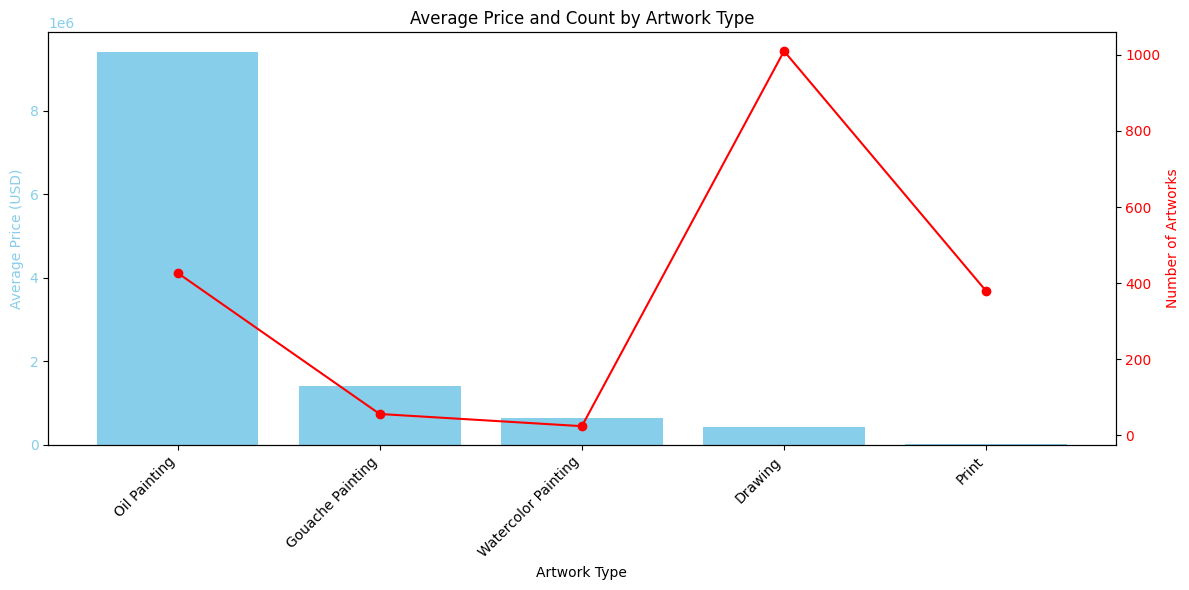

In [105]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 막대 그래프 생성 (두 개의 y축 사용)
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 y축 (평균 가격)
bars = ax1.bar(type_stats.index, type_stats['Average Price'], color='skyblue')
ax1.set_xlabel('Artwork Type')
ax1.set_ylabel('Average Price (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 두 번째 y축 (작품 수)
ax2 = ax1.twinx()
line = ax2.plot(type_stats.index, type_stats['Count'], color='red', marker='o')
ax2.set_ylabel('Number of Artworks', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 제목 설정
plt.title('Average Price and Count by Artwork Type')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

<Figure size 1200x600 with 0 Axes>

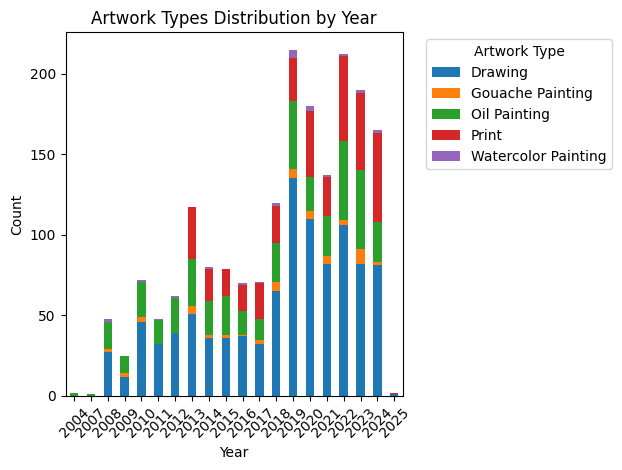

In [106]:
# Visualization

plt.figure(figsize=(12, 6))
result.plot(kind='bar', stacked=True)
plt.title('Artwork Types Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Artwork Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()